### Import data

In [1]:
from pandas_datareader import data as pdr
import yfinance as yf
import pandas as pd
import numpy as np
import pickle
import os.path
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from DATA import get_filtered_stock_data as gfs
from DATA import read_data
from DATA import delete_pickle_file
from Effient_Frontier import efficient_frontier 
from Effient_Frontier import ESG_efficient_frontier
from Effient_Frontier import ESG_efficient_frontier_gw
from backtest import backtest
from Effient_Frontier import get_mean_matrices
from Effient_Frontier import get_cov_matrices

In [2]:
#delete_pickle_file('ESG_US.csv.pickle')

In [3]:
file_path = "ESG_US.csv"
esg = read_data(file_path)
column_name = 'environment_score'
column_value = 'High'
threshold = 0
operator = 'geq'
prefixes= ['US']
start_date = '2000-01-01'
end_date = '2020-01-01'

In [4]:
returns = gfs(file_path, column_name, column_value, prefixes, start_date, end_date, time='y', threshold=threshold, operator=operator)

In [5]:
mu = get_mean_matrices(returns)
cov =  get_cov_matrices(returns)[1]
esg = read_data(file_path)
target = np.linspace(np.min(mu), np.max(mu), 100)
rf = 0.00
bounds = [(0, 1) for _ in range(len(mu))]
score = 'environment_score'
window = 5
get_plots = False

In [6]:
#eff = efficient_frontier(mu, cov, target, rf, bounds, esg, returns, score)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -4.332530232144088
            Iterations: 65
            Function evaluations: 21850
            Gradient evaluations: 65


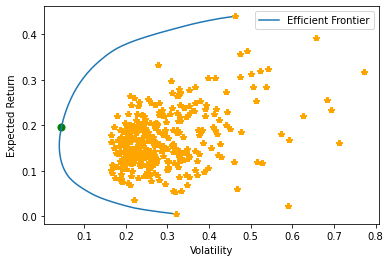

In [7]:
#Get the mean return of the stocks and the covariance matrix
mean = get_mean_matrices(returns)
cov = get_cov_matrices(returns)[1]
        
#Set the target, used for the efficient frontier module 
target = np.linspace(np.min(mean), np.max(mean), 100)
        
#Create the bounds
bounds = [(0, 1) for _ in range(len(mean))]
        
#Alot of computation here is unessecary for the backtest. 
max_sharpe_ret, max_sharpe_vol, max_sharpe_sr, portfolio_esg, frontier, mu, stdevs , w_opt  = efficient_frontiermax_sharpe_ret, max_sharpe_vol, max_sharpe_sr, portfolio_esg, frontier, mu, stdevs , w_opt  = efficient_frontier(mu, cov, target, rf, bounds, returns, esg=None, score=None,get_plots = True)

plt.plot(frontier[:,1], frontier[:,0], label='Efficient Frontier')
plt.plot(stdevs, mu, '*', color='orange')
plt.xlabel('Volatility')
plt.ylabel('Expected Return')
plt.legend()

# Plot a red dot at the portfolio with the highest Sharpe ratio
plt.scatter(max_sharpe_vol, max_sharpe_ret, marker='o', color='g', s=50, label='Max Sharpe Ratio')
plt.show()

In [8]:
w_opt.round(3)

array([0.   , 0.   , 0.   , 0.008, 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.052, 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.007, 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.041, 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.005, 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.087, 0.004, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.012, 0.   , 0.   , 0.018,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.01 , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.043, 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.013, 0.   ,
       0.   , 0.   ,

In [9]:
ESG_fron = ESG_efficient_frontier(file_path, column_name, column_value, prefixes, start_date, end_date, time='y', operator=operator, esg=esg, rf=rf, score=score,get_plots = True)

400
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3.9882975899676376
            Iterations: 57
            Function evaluations: 15000
            Gradient evaluations: 57
425
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3.9979088061930304
            Iterations: 56
            Function evaluations: 14234
            Gradient evaluations: 56
450
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3.8743495957535665
            Iterations: 47
            Function evaluations: 11473
            Gradient evaluations: 47
475
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3.870420666417895
            Iterations: 50
            Function evaluations: 11804
            Gradient evaluations: 50
500
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3.853234407024538
            Iter

Text(0, 0.5, 'Sharpe Ratio')

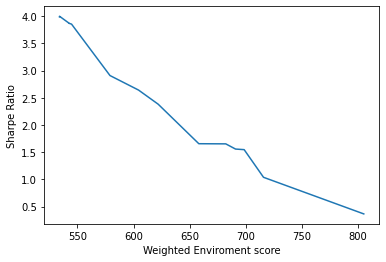

In [10]:
plt.plot(ESG_fron[1], ESG_fron[0])
plt.xlabel('Weighted Enviroment score')
plt.ylabel('Sharpe Ratio')

In [11]:
ESG_GW = ESG_efficient_frontier_gw(rf,returns,esg,score)

400
Optimal weights: [0.     0.     0.     0.0082 0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.0519 0.     0.     0.     0.
 0.     0.     0.0069 0.     0.     0.     0.     0.     0.     0.0006
 0.     0.     0.0409 0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.0054 0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.0871 0.0038 0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.012  0.     0.     0.0179
 0.     0.     0.     0.     0.     0.     0.0101 0.     0.     0.
 0.     0.     0.     0.     0.     0.0432 0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.013  0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.001  0.     0.053  0.     0.
 0.     0.     0.     0.     0.  

Optimal weights: [0.     0.     0.     0.011  0.     0.     0.     0.     0.     0.
 0.0054 0.     0.     0.     0.     0.0525 0.     0.     0.     0.
 0.     0.     0.0122 0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.0242 0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.0107 0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.0997 0.     0.     0.     0.     0.0117 0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.0165 0.     0.     0.0308
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.0412 0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.0065 0.     0.     0.     0.     0.
 0.0029 0.     0.     0.     0.     0.005  0.     0.0307 0.     0.
 0.     0.     0.     0.     0.     0.   

Optimal weights: [0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.056  0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.0159 0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.1214 0.     0.     0.     0.     0.0268 0.
 0.     0.     0.     0.     0.     0.     0.0121 0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.0249
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.0021 0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.   

Optimal weights: [0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.0403 0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.

Text(0, 0.5, 'Sharpe Ratio')

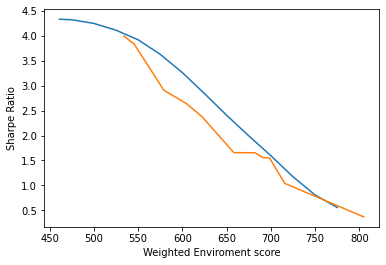

In [17]:
plt.plot(ESG_GW[1], ESG_GW[0])
plt.plot(ESG_fron[1], ESG_fron[0])
plt.xlabel('Weighted Enviroment score')
plt.ylabel('Sharpe Ratio')

In [18]:
BacktestDF = backtest(rf, esg, returns, score, window,get_plots,num=None)

n is  20
Current loop  0
Optimization terminated successfully    (Exit mode 0)
            Current function value: -16.67837796956559
            Iterations: 197
            Function evaluations: 66024
            Gradient evaluations: 196
[8.61280390e-03 3.42522156e-10 2.07515574e-11 2.03341277e-16
 3.82928181e-15 0.00000000e+00 2.01036736e-11 1.58919870e-10
 0.00000000e+00 7.83612526e-10 0.00000000e+00 1.35555593e-02
 2.50031822e-03 6.64909698e-11 0.00000000e+00 5.17337349e-03
 2.76134930e-03 0.00000000e+00 5.13163596e-12 2.19060153e-10
 1.55598881e-03 1.30935512e-02 0.00000000e+00 1.72657160e-15
 4.92710509e-11 0.00000000e+00 3.39080356e-11 7.14197787e-11
 0.00000000e+00 8.40553031e-03 0.00000000e+00 7.64628152e-16
 3.44562716e-03 0.00000000e+00 7.99989899e-03 5.47702997e-03
 8.37370807e-03 0.00000000e+00 5.66792888e-15 0.00000000e+00
 0.00000000e+00 8.63103321e-12 7.88963946e-03 9.58872226e-16
 0.00000000e+00 0.00000000e+00 0.00000000e+00 4.46644843e-04
 1.64612368e-02 1.76690484e-

Optimization terminated successfully    (Exit mode 0)
            Current function value: -17.05809223735913
            Iterations: 183
            Function evaluations: 61627
            Gradient evaluations: 183
[8.96675276e-03 5.83275913e-11 0.00000000e+00 0.00000000e+00
 2.10226058e-11 0.00000000e+00 5.87342332e-11 6.29266228e-12
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.63445993e-02
 1.53413411e-03 1.56768481e-11 0.00000000e+00 3.98421276e-03
 1.27630017e-03 0.00000000e+00 0.00000000e+00 1.47161162e-11
 2.26979441e-03 8.29859193e-03 0.00000000e+00 0.00000000e+00
 3.53283019e-11 2.39262376e-12 5.72425961e-12 8.29417533e-12
 0.00000000e+00 1.12530805e-02 2.03958107e-11 3.59098202e-13
 2.09251118e-03 0.00000000e+00 1.31621045e-02 1.01778759e-02
 6.97128158e-03 0.00000000e+00 1.37515334e-11 0.00000000e+00
 7.68881989e-04 3.74198699e-11 1.04065350e-02 3.32836014e-11
 0.00000000e+00 0.00000000e+00 0.00000000e+00 7.83479745e-03
 0.00000000e+00 2.90908916e-11 6.43077198e-03 2.04727

Optimization terminated successfully    (Exit mode 0)
            Current function value: -9.45502939099394
            Iterations: 113
            Function evaluations: 38037
            Gradient evaluations: 113
[9.79527854e-03 0.00000000e+00 2.87365491e-11 7.00863919e-03
 3.15834060e-11 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.36713565e-02 0.00000000e+00
 7.20774910e-12 1.91490906e-11 1.70439866e-11 2.37490708e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 3.86204777e-12
 4.23348413e-11 2.68627813e-11 1.24091648e-02 0.00000000e+00
 9.74243188e-12 4.06541820e-03 0.00000000e+00 0.00000000e+00
 3.15202007e-11 3.05069221e-11 0.00000000e+00 5.98589897e-11
 2.75205020e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 7.43590464e-03 3.99811299e-11
 2.98305565e-11 0.00000000e+00 5.12247350e-11 5.18495405e-11
 1.48941934e-02 0.00000000e+00 7.16978636e-12 0.00000000e+00
 1.31443216e-11 4.49820129e-03 2.89043376e-02 0.000000

Optimization terminated successfully    (Exit mode 0)
            Current function value: -7.847196571365488
            Iterations: 95
            Function evaluations: 31986
            Gradient evaluations: 95
[1.32323450e-03 2.12836257e-10 0.00000000e+00 1.33539196e-02
 0.00000000e+00 6.72501935e-11 3.70513187e-10 2.40712321e-10
 2.76457360e-11 5.38011593e-10 2.79603309e-02 1.67380864e-10
 0.00000000e+00 5.15092551e-12 0.00000000e+00 3.46444381e-03
 2.77751354e-11 2.47588966e-10 1.17402166e-09 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.54488527e-02 2.75507227e-11
 1.03929917e-11 8.50812116e-03 0.00000000e+00 3.60650857e-11
 0.00000000e+00 0.00000000e+00 2.19498213e-10 0.00000000e+00
 1.76031761e-02 4.82234966e-11 1.32194929e-10 2.59338151e-10
 1.18960700e-10 2.58290505e-10 1.43924564e-02 0.00000000e+00
 0.00000000e+00 3.63481814e-11 0.00000000e+00 3.33381130e-03
 1.69169266e-02 2.15690985e-10 8.89204613e-11 6.21430488e-11
 0.00000000e+00 0.00000000e+00 3.34603417e-02 7.2991436

Optimization terminated successfully    (Exit mode 0)
            Current function value: -11.391859362677959
            Iterations: 133
            Function evaluations: 44785
            Gradient evaluations: 133
[1.71455895e-11 0.00000000e+00 0.00000000e+00 9.49480366e-03
 0.00000000e+00 1.42031741e-12 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 4.49764156e-02 0.00000000e+00
 1.03912463e-12 0.00000000e+00 0.00000000e+00 4.68945757e-11
 0.00000000e+00 1.54695519e-11 0.00000000e+00 2.70126447e-11
 1.96901548e-11 0.00000000e+00 2.57517957e-02 0.00000000e+00
 7.61599959e-13 2.73601345e-11 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.55687556e-04 0.00000000e+00 4.74283233e-03
 1.59166153e-02 5.12791091e-11 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.88343914e-11 5.79105229e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.45045494e-12 1.39397478e-02
 6.07010057e-03 0.00000000e+00 0.00000000e+00 3.31301454e-11
 0.00000000e+00 1.30327464e-02 4.30978985e-03 4.8401

Optimization terminated successfully    (Exit mode 0)
            Current function value: -34.834315454204564
            Iterations: 351
            Function evaluations: 118263
            Gradient evaluations: 351
[4.40536934e-11 2.37769722e-11 2.95210843e-03 4.80687902e-03
 2.05723515e-11 5.37628114e-05 3.63575318e-10 8.71637404e-13
 2.83180290e-04 0.00000000e+00 7.54774592e-03 2.18378455e-03
 3.67617231e-03 5.41616346e-03 5.87249469e-03 0.00000000e+00
 4.68689428e-03 1.64313602e-03 1.97765487e-10 6.69204770e-03
 2.25014553e-03 2.96702175e-03 6.05544048e-03 5.81863851e-04
 1.41179940e-03 1.84690619e-03 8.77777049e-03 2.36295595e-11
 0.00000000e+00 2.95271996e-03 0.00000000e+00 3.16293379e-03
 4.24310598e-03 7.60489115e-03 9.83369271e-11 4.51853928e-11
 1.61067815e-10 7.81411555e-03 3.00381906e-03 0.00000000e+00
 8.76211395e-04 3.73851849e-10 0.00000000e+00 9.02991418e-03
 0.00000000e+00 0.00000000e+00 1.60581134e-11 6.51889302e-03
 1.67822882e-10 3.47021400e-03 7.20294247e-04 6.456

Optimization terminated successfully    (Exit mode 0)
            Current function value: -26.87426365860819
            Iterations: 289
            Function evaluations: 97389
            Gradient evaluations: 289
[1.37124163e-10 1.16901009e-11 5.73811599e-03 8.11725598e-13
 1.14763860e-02 5.25924562e-03 1.03946252e-02 5.58113123e-11
 2.85410994e-11 9.21773062e-04 7.67978656e-03 6.15637063e-03
 8.21816202e-03 1.76224664e-03 7.41655893e-03 1.83794502e-02
 1.34782381e-03 1.22305279e-11 2.28475025e-03 4.20790257e-03
 7.71619215e-12 1.84187479e-12 1.19141200e-03 1.62409667e-03
 4.26911737e-03 6.70619885e-04 4.31169883e-03 1.47082683e-10
 1.16713156e-11 4.78097790e-03 1.29918087e-03 3.60184681e-04
 4.24806522e-03 9.06674020e-03 4.26816482e-03 4.88760748e-12
 4.15731649e-03 5.94489583e-12 3.25412347e-03 1.64364146e-03
 5.10205019e-11 3.71050038e-11 5.60489777e-03 9.85560794e-12
 1.52065128e-12 4.24716166e-12 1.54471292e-11 3.87011521e-03
 2.29854990e-03 8.97948655e-12 8.76916900e-04 5.51692

Optimization terminated successfully    (Exit mode 0)
            Current function value: -20.268294458948276
            Iterations: 224
            Function evaluations: 75460
            Gradient evaluations: 224
[1.98144851e-03 6.96071733e-03 0.00000000e+00 6.65136528e-03
 3.52351682e-03 1.35609875e-02 3.87001111e-02 5.89919338e-04
 3.98897776e-05 0.00000000e+00 7.38717385e-03 4.79927627e-11
 0.00000000e+00 1.86793880e-03 0.00000000e+00 2.56486902e-02
 5.51489874e-03 1.31625794e-11 1.33178125e-11 3.84260859e-03
 0.00000000e+00 0.00000000e+00 6.19142772e-03 0.00000000e+00
 2.47072708e-03 0.00000000e+00 0.00000000e+00 5.00448592e-11
 0.00000000e+00 7.78048696e-03 9.39478710e-03 6.85508679e-03
 1.26478821e-02 5.13209558e-03 0.00000000e+00 1.45034732e-11
 0.00000000e+00 8.63047656e-11 0.00000000e+00 4.73898270e-03
 0.00000000e+00 2.74634546e-11 2.91756563e-03 0.00000000e+00
 4.23937929e-03 4.01027438e-03 6.25461931e-11 0.00000000e+00
 2.13659384e-02 2.18828501e-04 0.00000000e+00 5.5406

In [19]:
display(BacktestDF)

,Expected returns,Realized returns,Expected stds,Realized stds,Expected srs,Realized srs,Portfolio Value,Portfolio E Score
0,0.309400,0.173639,0.018551,0.060798,16.678378,2.855991,117.363944,467.508044
1,0.322588,0.169898,0.018146,0.068189,17.777520,2.491579,137.303888,472.217599
2,0.258054,0.119646,0.015128,0.061779,17.058092,1.936686,153.731785,478.820784
3,0.315328,-0.253545,0.009943,0.254527,31.714215,-0.996142,114.753910,485.573492
4,0.190473,0.265003,0.020145,0.047605,9.455029,5.566758,145.164055,467.354627
5,0.196588,0.264038,0.024206,0.030428,8.121632,8.677560,183.492912,459.164647
6,0.198999,0.144459,0.025359,0.030743,7.847197,4.698932,210.000050,466.501830
7,0.185029,0.206000,0.024035,0.014564,7.698210,14.144905,253.260013,469.130877
8,0.238199,0.319747,0.020910,0.036432,11.391859,8.776636,334.239155,445.641927
9,0.278860,0.219022,0.010265,0.027976,27.167085,7.828875,407.445004,465.156750


In [20]:
display(BacktestDF.mean())

Expected returns       0.241987
Realized returns       0.155659
Expected stds          0.015284
Realized stds          0.062529
Expected srs          19.378307
Realized srs           6.397772
Portfolio Value      328.523801
Portfolio E Score    464.859964
dtype: float64

In [21]:
BacktestDF20 = backtest(rf, esg, returns, score, window,get_plots,num=20)

n is  20
Current loop  0
Optimization terminated successfully    (Exit mode 0)
            Current function value: -23.259164474285054
            Iterations: 27
            Function evaluations: 597
            Gradient evaluations: 27
[1.06316493e-01 4.76950914e-02 8.49454898e-02 6.31924210e-02
 2.44619259e-02 8.02511232e-02 3.76609917e-02 4.14769981e-13
 1.76843020e-12 1.35163494e-01 0.00000000e+00 5.35765479e-02
 0.00000000e+00 1.02890261e-13 0.00000000e+00 1.23304423e-01
 1.08499928e-01 1.34932073e-01 0.00000000e+00 0.00000000e+00]
For window:  0
Expected return:  0.39743580918247573
Realized return:  0.24674934913039193
Expected volatility:  0.017087277989795126
Realized volatility:  0.0695031956400795
Portfolio value:  124.67493491303921


Current loop  1
Optimization terminated successfully    (Exit mode 0)
            Current function value: -26.726214926655093
            Iterations: 37
            Function evaluations: 830
            Gradient evaluations: 37
[0.03975269 0.0

In [22]:
display(BacktestDF20)

,Expected returns,Realized returns,Expected stds,Realized stds,Expected srs,Realized srs,Portfolio Value,Portfolio E Score
0,0.397436,0.246749,0.017087,0.069503,23.259164,3.550187,124.674935,459.050109
1,0.410473,0.175774,0.015358,0.105818,26.726215,1.661090,146.589502,499.645075
2,0.198299,0.198253,0.015549,0.020296,12.753206,9.768191,175.651283,558.136756
3,0.254652,-0.120605,0.006451,0.169170,39.477394,-0.712922,154.466820,514.777768
4,0.224489,0.135649,0.023769,0.036627,9.444449,3.703489,175.420014,505.106041
5,0.201077,0.321068,0.018361,0.054602,10.951186,5.880160,231.741792,492.333915
6,0.227020,0.196951,0.026081,0.033459,8.704538,5.886322,277.383665,584.614776
7,0.229038,0.205748,0.027480,0.025045,8.334686,8.215240,334.454744,562.873318
8,0.243033,0.311171,0.014926,0.035273,16.282728,8.821867,438.527437,492.115234
9,0.259128,0.192728,0.010861,0.035332,23.858491,5.454810,523.044108,467.675249


In [24]:
BacktestDF20.mean()

Expected returns       0.253424
Realized returns       0.169325
Expected stds          0.015496
Realized stds          0.059189
Expected srs          19.077837
Realized srs           5.288748
Portfolio Value      408.606704
Portfolio E Score    500.313157
dtype: float64

In [16]:
'''
max_sharpe_ret = eff[0]
max_sharpe_vol = eff[1]
max_sharpe_sr = eff[2]
portfolio_esg = eff[3]
print(portfolio_esg)
fron=eff[4]
mu = eff[5]
stdevs_ = eff[6]
'''

'\nmax_sharpe_ret = eff[0]\nmax_sharpe_vol = eff[1]\nmax_sharpe_sr = eff[2]\nportfolio_esg = eff[3]\nprint(portfolio_esg)\nfron=eff[4]\nmu = eff[5]\nstdevs_ = eff[6]\n'

In [28]:
returns

,US0010551028,US00130H1059,US00206R1023,US0028241000,US00507V1098,US00724F1012,US0079031078,US00846U1016,US0091581068,US00971T1016,...,US95040Q1040,US9553061055,US9581021055,US9621661043,US9633201069,US9694571004,US98389B1008,US9884981013,US9892071054,US9897011071
Date,,,,,,,,,,,,,,,,,,,,,
2000-12-31 00:00:00-05:00,0.568108,0.572474,0.142256,0.419345,0.244731,0.965573,0.248602,0.249632,0.349111,-1.774250,...,0.221373,-0.125703,0.357559,-0.186988,-0.111878,0.387497,0.527701,0.001256,-0.075140,0.276890
2001-12-31 00:00:00-05:00,-0.309166,-0.894298,-0.112119,0.196803,1.131498,-0.293656,0.532388,-0.423866,0.199266,-0.451732,...,0.536797,0.142234,1.372039,0.144266,0.516773,-0.247396,0.038222,0.442774,0.447264,-0.125767
2002-12-31 00:00:00-05:00,0.280953,-0.600335,-0.229050,-0.226528,-0.375115,0.009448,-0.451015,-0.275532,-0.013863,-0.609030,...,0.210379,-0.015576,0.407528,0.011437,-0.233051,-0.608566,-0.479307,0.074147,0.112160,-0.225180
2003-12-31 00:00:00-05:00,0.223893,1.344514,0.091407,0.204126,0.708501,0.539828,0.982310,0.596086,0.256292,2.327756,...,0.378208,0.417614,0.819096,0.321070,0.393653,1.524451,0.509407,0.383702,0.588815,0.485018
2004-12-31 00:00:00-05:00,0.122360,0.426866,0.071154,0.111349,0.576037,0.519929,0.497509,-0.119491,0.133296,0.377507,...,0.158694,0.449028,0.021527,0.097080,0.005374,0.559672,0.125849,0.344861,0.291413,0.137636
2005-12-31 00:00:00-05:00,0.181457,0.183267,0.027945,-0.127497,0.266876,0.218378,0.437978,0.359035,0.059112,0.496706,...,-0.030173,0.067530,0.631601,0.033817,0.252682,0.419026,0.070970,0.025568,-0.220103,0.139700
2006-12-31 00:00:00-05:00,0.015297,0.359791,0.456534,0.251691,0.302331,0.159528,-0.275956,0.145807,0.211011,1.125308,...,0.328288,0.779880,0.179946,0.120605,0.043503,0.170241,0.275885,0.263793,-0.175435,0.118699
2007-12-31 00:00:00-05:00,0.356413,0.012957,0.224926,0.184486,0.615431,0.067905,-0.926474,0.087523,0.384501,-0.300856,...,0.118121,-0.168586,0.456204,0.118234,0.049287,0.360661,0.041761,0.308761,0.035055,-0.505393
2008-12-31 00:00:00-05:00,-0.085881,-0.671726,-0.212075,0.020359,-0.335364,-0.540892,-0.877806,-0.735768,-0.511428,-0.566218,...,0.154991,0.033024,-0.719714,-0.652227,-0.481040,-0.619222,-0.096475,-0.067024,-0.428876,-0.094906


In [27]:
returns[0+5-1:0+5+1]

,US0010551028,US00130H1059,US00206R1023,US0028241000,US00507V1098,US00724F1012,US0079031078,US00846U1016,US0091581068,US00971T1016,...,US95040Q1040,US9553061055,US9581021055,US9621661043,US9633201069,US9694571004,US98389B1008,US9884981013,US9892071054,US9897011071
Date,,,,,,,,,,,,,,,,,,,,,
2004-12-31 00:00:00-05:00,0.122360,0.426866,0.071154,0.111349,0.576037,0.519929,0.497509,-0.119491,0.133296,0.377507,...,0.158694,0.449028,0.021527,0.097080,0.005374,0.559672,0.125849,0.344861,0.291413,0.137636
2005-12-31 00:00:00-05:00,0.181457,0.183267,0.027945,-0.127497,0.266876,0.218378,0.437978,0.359035,0.059112,0.496706,...,-0.030173,0.067530,0.631601,0.033817,0.252682,0.419026,0.070970,0.025568,-0.220103,0.139700
